This program predicts the price of a bitcoin for a specific day

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')

In [ ]:
#Import the data
dataset = pd.read_csv('dataset.csv')
dataset

,Date,Open,High,Low,Close
0,01-01-2022,46311.74609,47827.31250,46288.48438,47686.81250
1,02-01-2022,47680.92578,47881.40625,46856.93750,47345.21875
2,03-01-2022,47343.54297,47510.72656,45835.96484,46458.11719
3,04-01-2022,46458.85156,47406.54688,45752.46484,45897.57422
4,05-01-2022,45899.35938,46929.04688,42798.22266,43569.00391
5,06-01-2022,43565.51172,43748.71875,42645.53906,43160.92969
6,07-01-2022,43153.57031,43153.57031,41077.44531,41557.90234
7,08-01-2022,41561.46484,42228.94141,40672.27734,41733.94141
8,09-01-2022,41734.72656,42663.94922,41338.16016,41911.60156
9,10-01-2022,41910.23047,42199.48438,39796.57031,41821.26172


In [ ]:
#Get and print the last row of data
test_price = dataset.tail(1)
test_price

,Date,Open,High,Low,Close
30,31-01-2022,37920.28125,38647.26172,36733.57422,38483.125


In [ ]:
#Prepare the data to train SVR model
#Get all the data except the last row
dataset = dataset.head(len(dataset) - 1)
dataset

,Date,Open,High,Low,Close
0,01-01-2022,46311.74609,47827.31250,46288.48438,47686.81250
1,02-01-2022,47680.92578,47881.40625,46856.93750,47345.21875
2,03-01-2022,47343.54297,47510.72656,45835.96484,46458.11719
3,04-01-2022,46458.85156,47406.54688,45752.46484,45897.57422
4,05-01-2022,45899.35938,46929.04688,42798.22266,43569.00391
5,06-01-2022,43565.51172,43748.71875,42645.53906,43160.92969
6,07-01-2022,43153.57031,43153.57031,41077.44531,41557.90234
7,08-01-2022,41561.46484,42228.94141,40672.27734,41733.94141
8,09-01-2022,41734.72656,42663.94922,41338.16016,41911.60156
9,10-01-2022,41910.23047,42199.48438,39796.57031,41821.26172


In [ ]:
#Create empty list to store independent and dependent data
days = list()
close_prices = list()

In [ ]:
#Get the date and the close price
x = dataset.loc[:, 'Date']
y = dataset.loc[:, 'Close']

In [ ]:
#Create the independent dataset
for day in x:
  days.append( [int(day.split('-')[0])])

#Create the dependent dataset
for close_price in y:
  close_prices.append(float(close_price))
   

In [ ]:
#print
print(days)
print(close_prices)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
[47686.8125, 47345.21875, 46458.11719, 45897.57422, 43569.00391, 43160.92969, 41557.90234, 41733.94141, 41911.60156, 41821.26172, 42735.85547, 43949.10156, 42591.57031, 43099.69922, 43177.39844, 43113.87891, 42250.55078, 42375.63281, 41744.32813, 40680.41797, 36457.31641, 35030.25, 36276.80469, 36654.32813, 36954.00391, 36852.12109, 37138.23438, 37784.33203, 38138.17969, 37917.60156]


In [ ]:
regressor.predict([[35]])

array([41117.08209567])

In [ ]:
#create and train SVR model using RBF kernel
from sklearn.svm import SVR
regressor1 = SVR(kernel='linear', C=1000.0)
regressor1.fit(days, close_prices)

regressor2 = SVR(kernel='poly', C=1000.0, degree= 2)
regressor2.fit(days, close_prices)

regressor3 = SVR(kernel='rbf', C=1000.0, gamma=0.15)
regressor3.fit(days, close_prices)

SVR(C=1000.0, gamma=0.15)

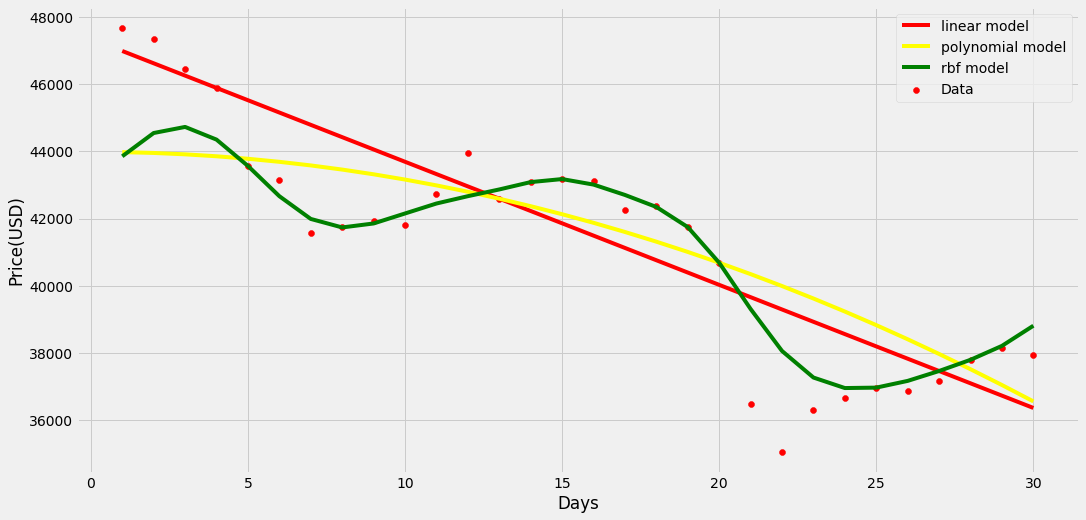

In [ ]:
#plotting the model on graph
plt.figure(figsize=(16, 8))
plt.scatter(days, close_prices, color= 'red', label= 'Data')
plt.plot(days, regressor1.predict(days), color= 'red', label='linear model')
plt.plot(days, regressor2.predict(days), color= 'yellow', label='polynomial model')
plt.plot(days, regressor3.predict(days), color= 'green', label='rbf model')
plt.xlabel('Days')
plt.ylabel('Price(USD)')
plt.legend()

In [ ]:
print('The rbf svr predicted: ', regressor3.predict([[31]]))
print('The linear svr predicted: ', regressor1.predict([[31]]))
print('The polynomial svr predicted: ', regressor2.predict([[31]]))
test_price


The rbf svr predicted:  [39566.16255612]
The linear svr predicted:  [35980.06249]
The polynomial svr predicted:  [36038.46636207]


,Date,Open,High,Low,Close
30,31-01-2022,37920.28125,38647.26172,36733.57422,38483.125
